# Intraclass correlation

#### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools
from scipy import stats
import warnings; warnings.simplefilter('ignore')
from IPython.display import display
import pingouin as pg

In [2]:
df_slps_sessions = pd.read_csv('fig_2.csv')

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.951195,39.979734,670,671,0.0,"[0.94, 0.96]"
1,ICC2,Single random raters,0.951239,41.504812,670,670,0.0,"[0.94, 0.96]"
2,ICC3,Single fixed raters,0.952947,41.504812,670,670,0.0,"[0.95, 0.96]"
3,ICC1k,Average raters absolute,0.974987,39.979734,670,671,0.0,"[0.97, 0.98]"
4,ICC2k,Average random raters,0.975010,41.504812,670,670,0.0,"[0.97, 0.98]"
5,ICC3k,Average fixed raters,0.975906,41.504812,670,670,0.0,"[0.97, 0.98]"


0.9540770245353546
ICC = 0.95
p = 0.0000
671 sessions


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.949835,38.868780,670,671,0.0,"[0.94, 0.96]"
1,ICC2,Single random raters,0.949896,40.840021,670,670,0.0,"[0.94, 0.96]"
2,ICC3,Single fixed raters,0.952199,40.840021,670,670,0.0,"[0.94, 0.96]"
3,ICC1k,Average raters absolute,0.974272,38.868780,670,671,0.0,"[0.97, 0.98]"
4,ICC2k,Average random raters,0.974304,40.840021,670,670,0.0,"[0.97, 0.98]"
5,ICC3k,Average fixed raters,0.975514,40.840021,670,670,0.0,"[0.97, 0.98]"


0.9529865529692354
ICC = 0.95
p = 0.0000
671 sessions


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.937494,30.996956,670,671,4.742033e-310,"[0.93, 0.95]"
1,ICC2,Single random raters,0.937493,30.975799,670,670,1.472216e-309,"[0.93, 0.95]"
2,ICC3,Single fixed raters,0.937453,30.975799,670,670,1.472216e-309,"[0.93, 0.95]"
3,ICC1k,Average raters absolute,0.967739,30.996956,670,671,4.742033e-310,"[0.96, 0.97]"
4,ICC2k,Average random raters,0.967738,30.975799,670,670,1.472216e-309,"[0.96, 0.97]"
5,ICC3k,Average fixed raters,0.967717,30.975799,670,670,1.472216e-309,"[0.96, 0.97]"


0.9374829462514674
ICC = 0.94
p = 0.0000
671 sessions


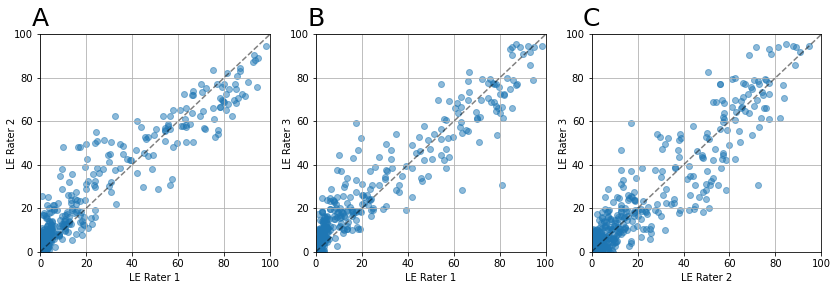

In [3]:
fig, axs = plt.subplots(1,3, figsize=(14,4))
abc = 'ABC'
slps_combinations = list(itertools.combinations(range(0,3), 2))
for i_plot, (i, j) in enumerate(slps_combinations):
    
    # Get common wavs between raters
    df_slp_1 = df_slps_sessions[['session_id', f'effort_SLP_{i + 1}']].rename(columns={f'effort_SLP_{i + 1}': 'effort'})
    df_slp_1['new_slp_id'] = 1
    df_slp_2 = df_slps_sessions[['session_id', f'effort_SLP_{j + 1}']].rename(columns={f'effort_SLP_{j + 1}': 'effort'})
    df_slp_2['new_slp_id'] = 2
    df_slps = pd.concat([df_slp_1, df_slp_2])

    # Calculate ICC
    icc = pg.intraclass_corr(data=df_slps, targets='session_id', raters='new_slp_id', ratings='effort')
    display(icc)


    df_slps = df_slps_sessions[[f'effort_SLP_{i + 1}',f'effort_SLP_{j + 1}']]

    print(df_slps.corr().iloc[0,1])

    ### Linear fit between the two raters
    x = df_slps[f'effort_SLP_{i + 1}']
    y = df_slps[f'effort_SLP_{j + 1}']
    
    res = stats.linregress(x, y)

    idx_corr = icc.ICC.idxmin()
    corr = icc.ICC.min()
    p_val = icc.pval.iloc[idx_corr]

    label = f'ICC = {corr:.2f}\np = {p_val:.4f}\n{len(df_slps)} sessions'
    
    axs[i_plot].scatter(
        df_slps[f'effort_SLP_{i + 1}'], df_slps[f'effort_SLP_{j + 1}'],
        alpha = 0.5,
        label = label
    )
    
    axs[i_plot].plot([0,100],[0,100], color='black', linestyle='--', alpha = 0.5)
    axs[i_plot].set_xlabel(f'LE Rater {i+1}')
    axs[i_plot].set_ylabel(f'LE Rater {j+1}')
    axs[i_plot].yaxis.set_label_coords(-0.1,0.5)
    axs[i_plot].grid()
    axs[i_plot].set_ylim(0,100)
    axs[i_plot].set_xlim(0,100)
    axs[i_plot].text(x=0,y=107,va='center',ha='center',s=abc[i_plot],fontsize=25)

   
    legend_entry = mlines.Line2D([], [], color='none', marker='None', label=label)
    print(label)